# Object detection

## Exploratory Data Analysis


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
from utils import utils

### Load dataset

In [2]:
header = pd.read_csv('../annotations/readme.txt')
header

,The CSV columns are: image_name,x1,y1,x2,y2,class,image_width,image_height


In [3]:
labels = pd.read_csv('../annotations/annotations_train.csv', header=None)
labels.head()

,0,1,2,3,4,5,6,7
0,train_0.jpg,208,537,422,814,object,3024,3024
1,train_0.jpg,1268,1923,1365,2209,object,3024,3024
2,train_0.jpg,1135,2074,1261,2166,object,3024,3024
3,train_0.jpg,1045,2085,1122,2258,object,3024,3024
4,train_0.jpg,976,2036,1040,2177,object,3024,3024


In [8]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208482 entries, 0 to 1208481
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1208482 non-null  object
 1   1       1208482 non-null  int64 
 2   2       1208482 non-null  int64 
 3   3       1208482 non-null  int64 
 4   4       1208482 non-null  int64 
 5   5       1208482 non-null  object
 6   6       1208482 non-null  int64 
 7   7       1208482 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 73.8+ MB


In [9]:
labels.nunique()

0    8219
1    4071
2    4383
3    4145
4    4569
5       1
6      33
7      33
dtype: int64

In [10]:
train_list, test_list, val_list = utils.listfiles('../images/')

794it [00:00, 15578.13it/s]

The total amount of TRAIN files are 558
The total amount of VALIDATION files are 38
The total amount of TEST files are 192


In [87]:
print(train_list)

['train_8084.jpg', 'train_4866.jpg', 'train_6917.jpg', 'train_6903.jpg', 'train_4872.jpg', 'train_8090.jpg', 'train_4682.jpg', 'train_6095.jpg', 'train_1922.jpg', 'train_2595.jpg', 'train_3853.jpg', 'train_2581.jpg', 'train_3847.jpg', 'train_1088.jpg', 'train_6081.jpg', 'train_1936.jpg', 'train_4696.jpg', 'train_5588.jpg', 'train_5563.jpg', 'train_3112.jpg', 'train_364.jpg', 'train_8047.jpg', 'train_7374.jpg', 'train_1705.jpg', 'train_1063.jpg', 'train_7412.jpg', 'train_3674.jpg', 'train_402.jpg', 'train_5205.jpg', 'train_416.jpg', 'train_3660.jpg', 'train_5211.jpg', 'train_6718.jpg', 'train_1077.jpg', 'train_7406.jpg', 'train_8053.jpg', 'train_7360.jpg', 'train_1711.jpg', 'train_5577.jpg', 'train_2218.jpg', 'train_370.jpg', 'train_3106.jpg', 'train_4669.jpg', 'train_7348.jpg', 'train_1739.jpg', 'train_6056.jpg', 'train_2230.jpg', 'train_4899.jpg', 'train_358.jpg', 'train_4641.jpg', 'train_4127.jpg', 'train_3648.jpg', 'train_2556.jpg', 'train_3890.jpg', 'train_5239.jpg', 'train_6730.jp

In [12]:
# labels['8'] = labels['8'].map(lambda x: 1 if labels['0'] in train_list)

SyntaxError: invalid syntax (1259143416.py, line 1)

### Get some stats

Complete the function `get_stats()` below:

## Working with images and OpenCV

In [73]:
# Load an image
img = cv2.imread('../images/train_1880.jpg')
# img = cv2.imread('../images/train_54.jpg')
print(f'Image type: {type(img)}')
print(f'Image shape: {img.shape} (Height x Width x Channels)')
print(f'Image min value: {img.min()}')
print(f'Image max value: {img.max()}')


Image type: <class 'numpy.ndarray'>
Image shape: (2560, 1920, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255


**Important Note:** An image loaded using OpenCV is just a Numpy array, keep in mind you can make use of all the numpy functionalities you know here.

In [74]:
# We can access to pixel values
px = img[100,100] 
print(px)


[121 137 143]


<class 'numpy.ndarray'>


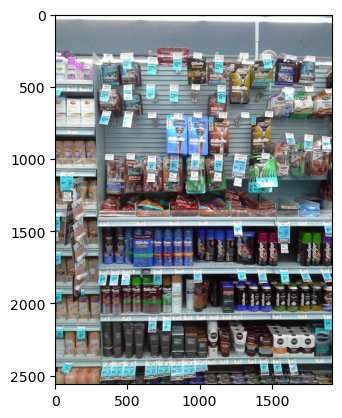

In [75]:
# Display
print(type(img))
plt.imshow(img)
plt.show()

**Important Note:** OpenCV uses BGR format while matplotlib uses RGB.

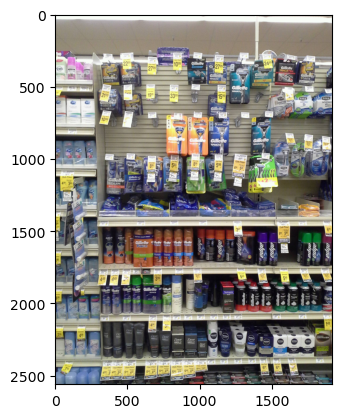

In [76]:
# Convert from RGB to RGB first
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Then display the converted image
plt.imshow(img_rgb)
plt.show()

In [77]:
# Buscar el nombre del archivo ../images/train_1880.jpg
train_1880 = labels.loc[labels[0]=='train_1880.jpg']

# extraer los BB del .csv
x1 = train_1880.iloc[0][1]
y1 = train_1880.iloc[0][2]
x2 = train_1880.iloc[0][3]
y2 = train_1880.iloc[0][4]
ax1 = train_1880.iloc[1][1]
ay1 = train_1880.iloc[1][2]
ax2 = train_1880.iloc[1][3]
ay2 = train_1880.iloc[1][4]
# dibujarle los BB


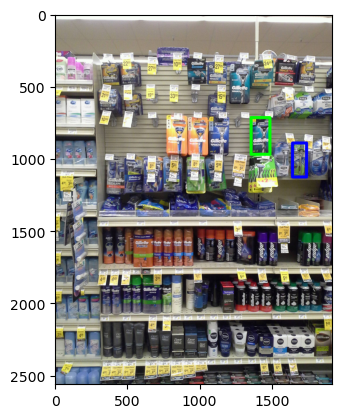

In [78]:
cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0,255,0), 20)
cv2.rectangle(img_rgb, (ax1, ay1), (ax2, ay2), (0,0,255), 20)
plt.imshow(img_rgb)
plt.show()

## Try to iterate over an entire image

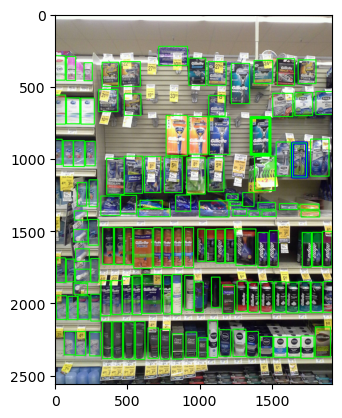

In [79]:
# print(train_1880)
# train_1880 = train_1880.reset_index()  # make sure indexes pair with number of rows

for index, row in train_1880.iterrows():
    x1 = row[1]
    y1 = row[2]
    x2 = row[3]
    y2 = row[4]
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0,255,0), 5)
plt.imshow(img_rgb)
plt.show()

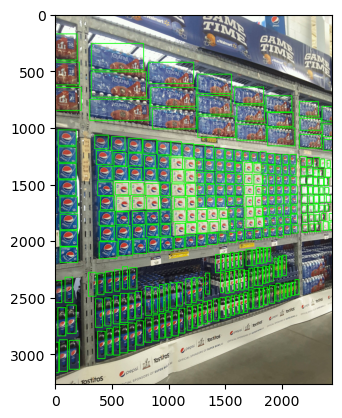

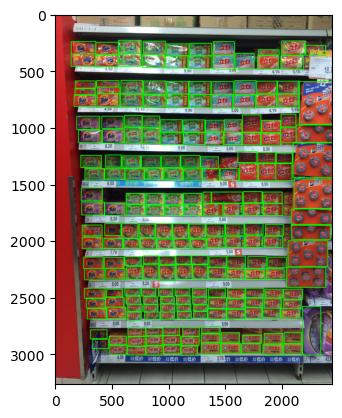

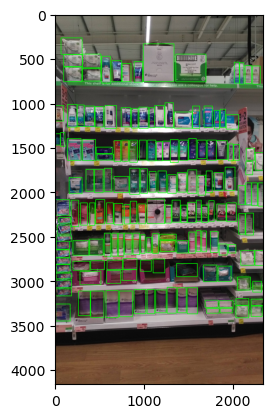

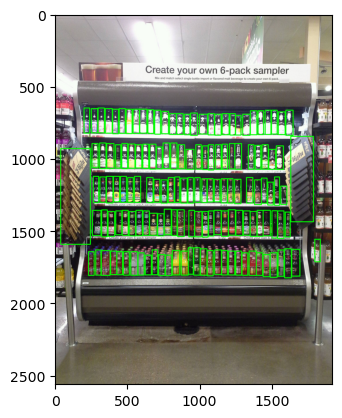

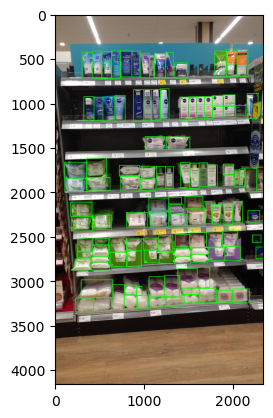

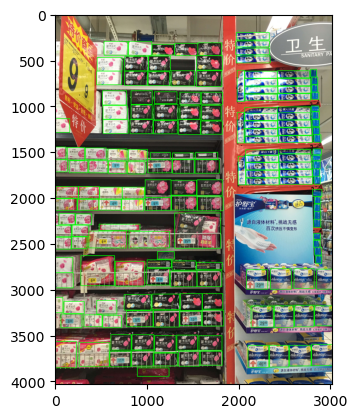

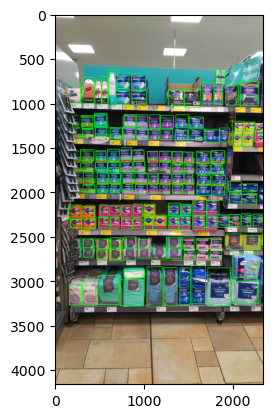

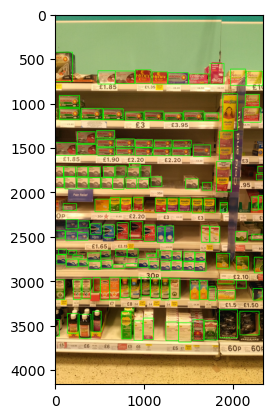

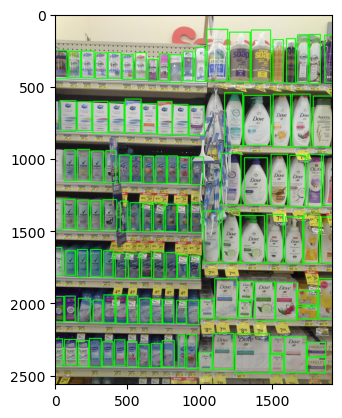

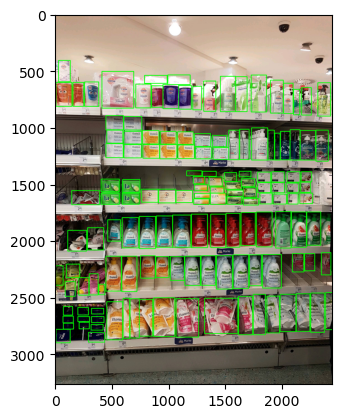

In [96]:
for file in train_list[20:30]:
    path = os.path.join('../images', file)
    img = cv2.imread(path)
    # Convert from GRB to RGB first
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Buscar el nombre del archivo ../images/train_1880.jpg
    train_file = labels.loc[labels[0]==file]
    for index, row in train_file.iterrows():
        x1 = row[1]
        y1 = row[2]
        x2 = row[3]
        y2 = row[4]
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0,255,0), 5)
    # Then display the converted image
    plt.imshow(img_rgb)
    plt.show()

## Load and display some images and their label

In [80]:
# sampled_rows = labels.sample(20, replace=False, random_state=12)
# corrupted_files = []
# for _, row in sampled_rows.iterrows():
#     try:
#         path = os.path.join('../images', row[0])
# #         print(path)
#         im = cv2.imread(path)
# #         print(type(im))
#         im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#         plt.imshow(im_rgb)
#         plt.show()
#     except:
#         print(f"no pudo abrir el archivo {path}")
#         corrupted_files.append(path)
# print(f"This are the amount of files corrupted: {len(corrupted_files)}")

In [81]:
utils.listfiles('../images/')

794it [00:00, 71682.07it/s]

The total amount of TRAIN files are 558
The total amount of VALIDATION files are 38
The total amount of TEST files are 192


(['train_8084.jpg',
  'train_4866.jpg',
  'train_6917.jpg',
  'train_6903.jpg',
  'train_4872.jpg',
  'train_8090.jpg',
  'train_4682.jpg',
  'train_6095.jpg',
  'train_1922.jpg',
  'train_2595.jpg',
  'train_3853.jpg',
  'train_2581.jpg',
  'train_3847.jpg',
  'train_1088.jpg',
  'train_6081.jpg',
  'train_1936.jpg',
  'train_4696.jpg',
  'train_5588.jpg',
  'train_5563.jpg',
  'train_3112.jpg',
  'train_364.jpg',
  'train_8047.jpg',
  'train_7374.jpg',
  'train_1705.jpg',
  'train_1063.jpg',
  'train_7412.jpg',
  'train_3674.jpg',
  'train_402.jpg',
  'train_5205.jpg',
  'train_416.jpg',
  'train_3660.jpg',
  'train_5211.jpg',
  'train_6718.jpg',
  'train_1077.jpg',
  'train_7406.jpg',
  'train_8053.jpg',
  'train_7360.jpg',
  'train_1711.jpg',
  'train_5577.jpg',
  'train_2218.jpg',
  'train_370.jpg',
  'train_3106.jpg',
  'train_4669.jpg',
  'train_7348.jpg',
  'train_1739.jpg',
  'train_6056.jpg',
  'train_2230.jpg',
  'train_4899.jpg',
  'train_358.jpg',
  'train_4641.jpg',
  'tr

In [82]:
from PIL import Image
try:
    path = '../images/val_370.jpg'
    img = Image.open(path)
    pixels = img.load()
    print(pixels[img.width-1,img.height-1])  # does provide tuple describing pixel
#     print(pixels[img.height-1,img.width-1])  # IndexError for non-square image
# summarize some details about the image
    print(img.format)
    print(img.mode)
    print(img.size)
except:
    print(f"This files couldn't be opened {path}")

(182, 129, 113)
JPEG
RGB
(2448, 3264)


In [83]:
from PIL import Image
sampled_rows = labels.sample(200, replace=False, random_state=123)
corrupted_files = []
for _, row in sampled_rows.iterrows():
    try:
        path = os.path.join('../images', row[0])
        img = Image.open(path)
        pixels = img.load()
        print(pixels[img.width-1,img.height-1])  # does provide tuple describing pixel
    except:
        print(f"no pudo abrir el archivo {path}")
        corrupted_files.append(path)
print(f"This are the amount of files corrupted: {len(corrupted_files)}")

no pudo abrir el archivo ../images/train_54.jpg
no pudo abrir el archivo ../images/train_3571.jpg
no pudo abrir el archivo ../images/train_219.jpg
no pudo abrir el archivo ../images/train_2156.jpg
no pudo abrir el archivo ../images/train_803.jpg
no pudo abrir el archivo ../images/train_5754.jpg
no pudo abrir el archivo ../images/train_4712.jpg
no pudo abrir el archivo ../images/train_3085.jpg
no pudo abrir el archivo ../images/train_2462.jpg
no pudo abrir el archivo ../images/train_343.jpg
no pudo abrir el archivo ../images/train_7036.jpg
no pudo abrir el archivo ../images/train_1875.jpg
no pudo abrir el archivo ../images/train_2761.jpg
no pudo abrir el archivo ../images/train_1284.jpg
no pudo abrir el archivo ../images/train_3356.jpg
no pudo abrir el archivo ../images/train_5128.jpg
no pudo abrir el archivo ../images/train_5892.jpg
no pudo abrir el archivo ../images/train_5237.jpg
no pudo abrir el archivo ../images/train_4435.jpg
no pudo abrir el archivo ../images/train_7119.jpg
no pu

(165, 170, 166)
no pudo abrir el archivo ../images/train_7079.jpg
no pudo abrir el archivo ../images/train_2241.jpg
no pudo abrir el archivo ../images/train_3620.jpg
no pudo abrir el archivo ../images/train_1020.jpg
no pudo abrir el archivo ../images/train_338.jpg
no pudo abrir el archivo ../images/train_1007.jpg
no pudo abrir el archivo ../images/train_2891.jpg
no pudo abrir el archivo ../images/train_6005.jpg
no pudo abrir el archivo ../images/train_7482.jpg
no pudo abrir el archivo ../images/train_4557.jpg
no pudo abrir el archivo ../images/train_4200.jpg
no pudo abrir el archivo ../images/train_95.jpg
no pudo abrir el archivo ../images/train_8079.jpg
no pudo abrir el archivo ../images/train_1433.jpg
no pudo abrir el archivo ../images/train_6198.jpg
no pudo abrir el archivo ../images/train_7902.jpg
no pudo abrir el archivo ../images/train_5919.jpg
no pudo abrir el archivo ../images/train_7050.jpg
no pudo abrir el archivo ../images/train_2090.jpg
no pudo abrir el archivo ../images/tr